In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
np.random.seed(42)

n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)

In [4]:
X

array([[ 0.49671415, -0.1382643 ,  0.64768854, ...,  0.15372511,
         0.05820872, -1.1429703 ],
       [ 0.35778736,  0.56078453,  1.08305124, ...,  1.35387237,
        -0.11453985,  1.23781631],
       [-1.59442766, -0.59937502,  0.0052437 , ..., -0.97876372,
        -0.44429326,  0.37730049],
       ..., 
       [ 0.71523658, -0.39335112, -1.58718807, ..., -0.03756351,
         0.56975892, -0.32417686],
       [-2.19750101,  1.26871389,  0.19022322, ...,  0.3753597 ,
        -0.11518833, -1.18308552],
       [ 0.93381043,  0.50323238,  2.30563684, ..., -0.70531672,
         0.49576557,  0.64438845]])

In [5]:
coef

array([-2.03548419, -0.91649839, -1.79214318,  0.33125414,  3.59153559,
       -2.31312647,  3.00246149, -2.34501622, -2.54288164,  2.45578386,
        2.76580913,  2.55422981, -3.94739222, -1.39785293,  2.46896578,
        0.12462552, -3.22107854,  1.37495382, -2.14442178,  5.38357455,
        4.63452439,  1.81229228,  4.08302011,  0.19437405,  2.29631248,
        4.43316089,  0.73649605, -0.76556151, -5.11386587, -0.24940058,
        2.47026955,  2.83690028,  1.5130952 , -1.62389728, -5.93046471,
       -1.48564529, -0.91303461, -0.9387869 ,  1.85566907,  5.95702923,
        0.37058761, -0.65019537, -0.77766544,  0.3731543 , -2.48488128,
        0.36059568,  1.35243701,  0.62905819,  1.3726258 ,  1.30124283,
       -5.31569005,  1.91061048, -2.01304454, -3.28751749, -3.31335548,
        1.30062483, -0.66772478, -5.04590635,  1.43411345, -4.31882439,
        0.41946408,  0.71549678,  2.65673125,  5.34505436, -4.09402898,
       -0.15742157, -0.82900589,  1.30124906,  0.64700631, -1.05

In [6]:
inds

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
np.random.shuffle(inds)

In [8]:
inds

array([112,  39, 159, 167, 115, 187,  26,  11,  80, 113, 180,  71,  49,
       148,   4, 127, 195, 158,  79,  54,  16,   6, 114,  27, 161, 182,
        28,  74,  87, 121,  25, 147, 141,  42, 189, 166, 162, 156, 192,
        96, 125, 160, 117,  38,  72,  40, 100, 151,  12,  97,  70,  60,
        67, 194,  66,   7, 157, 193, 170,  10,  98,  47, 109,  68, 178,
       154,   8,  31,  57,  35,  99, 168,  18, 128, 129,  81,  32,  94,
       138,  73,  34, 108, 130, 105,  56,  65, 185, 177, 186, 150,  24,
        53, 119, 145,  82, 173,  30,  29, 116,   3, 140,  64,   5, 126,
        44,  84,  91,  13,  92,  21, 131,   0,  48, 110, 102, 184,   2,
        62,  93,  86, 164,   1, 174,  19,  17,  36,  95,  15, 103, 196,
       143, 149, 153, 169,  41,  78, 190, 134, 139, 107,  20,  69, 122,
       135,  76, 123,  33, 198,  50, 104,  14, 176, 101, 152, 120, 171,
       124, 181,  58,  55,  85, 163, 165, 155, 118, 199, 197, 144,  23,
       175,  90, 183,  83, 188,  45,  51,  43,  22, 191,  52,  7

In [9]:
coef[inds[10:]] = 0  # sparsify coef

In [10]:
coef

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  2.55422981,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.73649605,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  5.95702923,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [11]:
y = np.dot(X, coef)

In [12]:
y

array([  1.85454808,  -1.88185275,  -3.22753722,  -1.29637962,
        12.21021156,   3.09834518,   0.83311376,  12.60558   ,
         3.29040286,   1.41273462,  -9.24393601,   0.82443959,
        -5.38482466,   8.74127838, -16.23212532,   7.61936206,
       -10.89723881,  -5.88004681,  -1.75512379,  -0.46345128,
        -5.8950359 ,  17.7640346 ,  -3.97835215, -19.89832756,
        -2.75872327,  -7.07454408,   3.74977501,  20.06851876,
        -4.15553144,  -8.24155577,   4.26803734,   3.33670968,
        13.20475772,   2.44885748, -10.51464129, -13.90984428,
        -5.76433803,  -1.73589121, -18.96316779,  -9.77324314,
         8.38704103,  -9.83929643,  15.54698292,   0.15803178,
        -6.68972473,  -3.45724035, -10.4518149 ,  -5.885115  ,
        -6.83404273,  -0.98061547])

In [13]:
y += 0.01 * np.random.normal((n_samples,))

In [14]:
y

array([  2.35193526,  -1.38446556,  -2.73015004,  -0.79899244,
        12.70759875,   3.59573237,   1.33050094,  13.10296718,
         3.78779004,   1.9101218 ,  -8.74654883,   1.32182677,
        -4.88743747,   9.23866556, -15.73473813,   8.11674925,
       -10.39985162,  -5.38265962,  -1.2577366 ,   0.0339359 ,
        -5.39764872,  18.26142178,  -3.48096496, -19.40094038,
        -2.26133609,  -6.57715689,   4.2471622 ,  20.56590595,
        -3.65814425,  -7.74416858,   4.76542452,   3.83409686,
        13.7021449 ,   2.94624467, -10.01725411, -13.4124571 ,
        -5.26695084,  -1.23850403, -18.4657806 ,  -9.27585596,
         8.88442821,  -9.34190925,  16.04437011,   0.65541897,
        -6.19233755,  -2.95985316,  -9.95442772,  -5.38772782,
        -6.33665554,  -0.48322829])

## Model Training

In [15]:
# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples / 2], y[:n_samples / 2]
X_test, y_test = X[n_samples / 2:], y[n_samples / 2:]

In [17]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.384710


In [18]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.240176


## Plot 

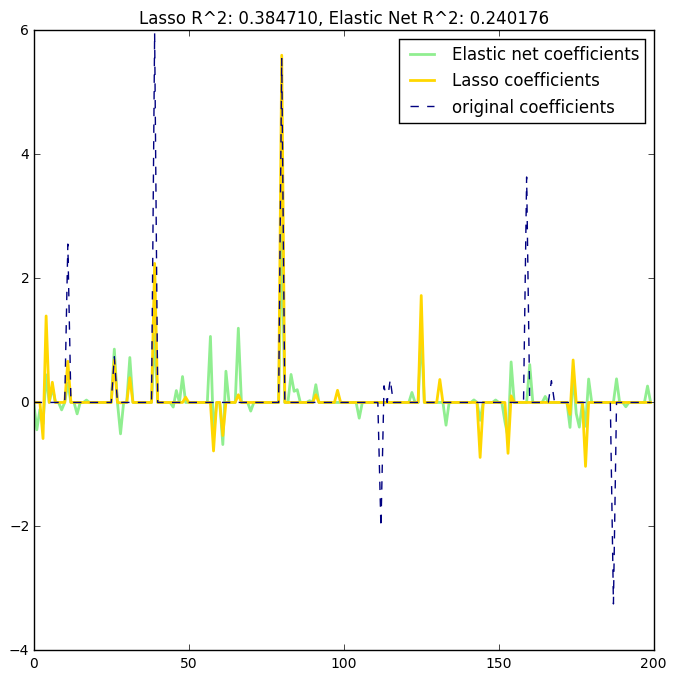

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))